# Redlining in Loveland, Colorado

Loveland, Colorado was officially establised in 1881. Named after the president of the Colorado Central Railroad, William A.H.Loveland, the city was established alongside newly constructed railroad line that connected Denver in the South to Fort Collins in the North. 

With the railroad, Loveland soon established itself as a shipping point for farmers, ranchers, and lunber suppliers.  and it's population more than trippled between 1882 and 1885. In 1901, the Great Western Sugar Company build a factor in Loveland which remains a primary source of employment until it's closure over 80 years later in 1985. 

Today, Loveland is the center of one of the fastest growing regions in the Nation, Northern Colorado - known as NoCo. The City's population as of 202 was 76,378.

## A Troubled Past

Of the 20 most populous cities in Colorado, Loveland is the whitest, with 84% identifying as 'white only' (kunc refernce)

This artificial 'whiteness' is not by accident. {reference } Prior to 1960, Loveland was one of the many towns in the United States that had unspoken 'Sundown Laws' which implied that people of color, Black or Hispanic, were not welcome. People arriving in Loveland were greeted by signs welcoming them to the "Nationally Famous Sweethart Town" with an additional sign underneath that read "We observe the Jim Crow Laws here." Many downtown businesses had signs stating 'White-Trade Only". Histanic residents who grew up in 50s and 60s recalled that people 'like them' just didn't live in certain parts of town (mostly West of the railroad tracks).

Loveland was known as a 'Sundowner Town' where "Black people were not allowed to be within the city limits after hours. And brown people were basically treated as second-class citizens," according to Bob Adame, a 73-year-old Loveland resident. In direct violation of Colorado state law that guarenteed residents access to public places regardless of race, many neighborhoods with HOAs mades sure that only whites could purchase homes. 

While progress has been made, the Citys black population is still only 1.5%, and it's hispanic population approximatley 3%. At a city councl meeting in 2021, when the city was considering measures to give non-white and LGBTQ residents more of a voice, one older white resident stated "I am not a fan of multiracilaims to be truthful. You can call me a racist if you want to."

References:

https://loveland.org/explore-loveland/loveland/facts-history/history-of-loveland/
https://www.reporterherald.com/2016/07/02/loveland-wasnt-immune-to-nations-divided-past/?clearUserState=true
https://www.kunc.org/2021-09-13/loveland-colorado-splinters-over-racist-sundown-town-past-and-increasingly-diverse-future


## Import Necessary Packages

In [ ]:
import os # Interoperable file paths
import pathlib # Find the home folder

import geopandas as gpd # Work with vector data
import hvplot.pandas # Interactive plots of vector data

In [2]:
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'fortcollinsrl'
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Site map

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Define your study area</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy the <strong>geopackage</strong> URL for the <a
href="https://dsl.richmond.edu/panorama/redlining/data">University of
Richmond</a></li>
<li>Load the <em>vector</em> data into Python, making sure to cache the
download so you don’t have to run it multiple times.</li>
<li>Create a quick plot to check the data</li>
</ol></div></div>

<Axes: >

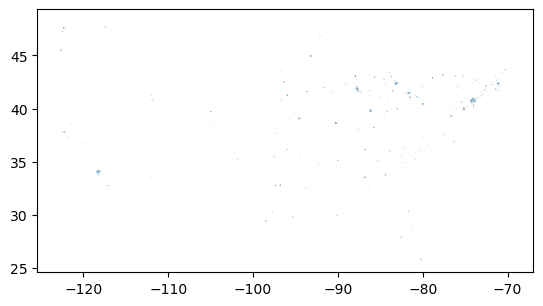

In [20]:
# Define info for redlining download
fortcollinsrl_url = (
    "https://dsl.richmond.edu"
    "/panorama/redlining/static/"
    "mappinginequality.gpkg"
)
# Set up a path to save the data on your machine
fortcollinsrl_dir = os.path.join(data_dir, 'fortcollinsrl')

# Make the redlining directory
os.makedirs(fortcollinsrl_dir, exist_ok=True)

# Join regions shapefile path
fortcollinsrl_path = os.path.join(fortcollinsrl_dir, 'loveland.gpkg')

# Only download once
if not os.path.exists(fortcollinsrl_path):
    # Read the GeoPackage file from the URL
    fortcollinsrl_gdf = gpd.read_file(fortcollinsrl_url)
    # Save the data as a GeoPackage to the local path
    fortcollinsrl_gdf.to_file(fortcollinsrl_path, driver='GPKG')

# Load from file
fortcollinsrl_gdf = gpd.read_file(fortcollinsrl_path)

#Check the data
fortcollinsrl_gdf.plot()

In [23]:
fortcollinsrl_gdf.head(5)

,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
0,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,"MULTIPOLYGON (((-86.75678 33.49754, -86.75653 ..."
1,193,Birmingham,AL,True,Best,A,A2,True,False,False,#76a865,"MULTIPOLYGON (((-86.75867 33.50933, -86.76134 ..."
2,206,Birmingham,AL,True,Best,A,A3,True,False,False,#76a865,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
3,203,Birmingham,AL,True,Still Desirable,B,B1,True,False,False,#7cb5bd,"MULTIPOLYGON (((-86.80111 33.48071, -86.80505 ..."
4,189,Birmingham,AL,True,Still Desirable,B,B10,True,False,False,#7cb5bd,"MULTIPOLYGON (((-86.74923 33.53333, -86.74971 ..."


In [24]:
# # Create an interactive site map

fortcollins_redlining_gdf = fortcollinsrl_gdf[fortcollinsrl_gdf.city=='Fort Collins'] 

fortcollinsrl_redlining_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='City of Loveland',
    fill_color=None, line_color='red', line_width=2,
    frame_width=600
)

NameError: name 'fortcollinsrl_redlining_gdf' is not defined

In [19]:


# Print the filtered GeoDataFrame to check if it's empty
print(loveland_redlining_gdf)


Empty GeoDataFrame
Columns: [area_id, city, state, city_survey, category, grade, label, residential, commercial, industrial, fill, geometry]
Index: []
